<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Face_Mask_Detection_Using_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Dataset

The dataset consisted of 1376 images, 690 face images with masks and 686 without masks. The original dataset is prepared by [Prajna Bhandary](https://www.linkedin.com/in/prajna-bhandary-0b03a416a/) and available at [Github](https://github.com/prajnasb/observations/tree/master/experiements/data)

# Data Preprocessing

In [ ]:
import cv2
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # Show only errors



data_path =r'C:\Users\micha\Desktop\dataset\facemask'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories, labels))

In [ ]:
print(os.getcwd())

C:\Users\micha\Desktop\dataset


In [ ]:
print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [ ]:
labels

[0, 1]

In [ ]:
len(categories)

2

In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image: {img_path}")
            continue #Skip this image and continue with the next

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

data = np.array(data)/255.0 #Normnalize the data to convert the pixel range
data = np.reshape(data, (data.shape[0], img_size, img_size, 1)) #Convert to a 4D array
target = np.array(target)

In [ ]:
from tensorflow.keras.utils import to_categorical

new_target = to_categorical(target)

In [ ]:
np.save('data', data)
np.save('target', new_target)

# Convolutional Neural Network Architecture

In [ ]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

#Loading the save numpy arrays in the previous code

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
data.shape

(1376, 100, 100, 1)

In [ ]:
model = Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3), input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(64, activation='relu'))

#The final layer with two outputsfor two categories
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 26s 786ms/step - loss: 0.7115 - accuracy: 0.5172 - val_loss: 0.6798 - val_accuracy: 0.5484
Epoch 2/20
31/31 [==============================] - 23s 757ms/step - loss: 0.5731 - accuracy: 0.6909 - val_loss: 0.4109 - val_accuracy: 0.8427
Epoch 3/20
31/31 [==============================] - 23s 757ms/step - loss: 0.3910 - accuracy: 0.8242 - val_loss: 0.3727 - val_accuracy: 0.8427
Epoch 4/20
31/31 [==============================] - 23s 757ms/step - loss: 0.2567 - accuracy: 0.9020 - val_loss: 0.2416 - val_accuracy: 0.9194
Epoch 5/20
31/31 [==============================] - 23s 754ms/step - loss: 0.1712 - accuracy: 0.9434 - val_loss: 0.2195 - val_accuracy: 0.9234
Epoch 6/20
31/31 [==============================] - 22s 709ms/step - loss: 0.1168 - accuracy: 0.9475 - val_loss: 0.2278 - val_accuracy: 0.9274
Epoch 7/20
31/31 [==============================] - 22s 711ms/step - loss: 0.0946 - accuracy: 0.9616 - val_loss: 0.2427 - val_accuracy: 0.9194

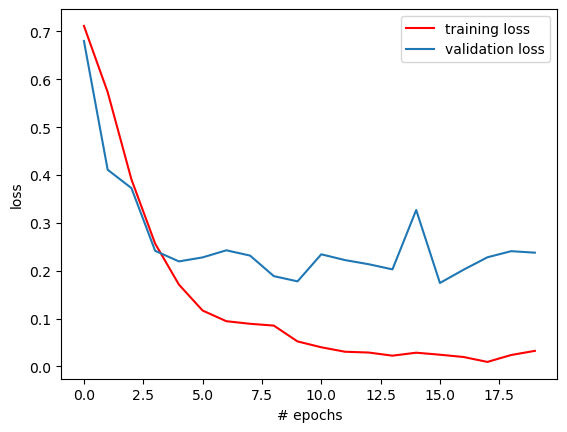

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

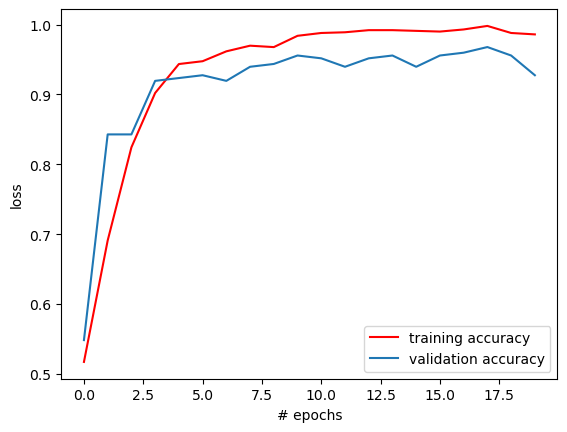

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 157ms/step - loss: 0.1660 - accuracy: 0.9565
[0.16598176956176758, 0.95652174949646]


# Detecting Faces with and without masks

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

In [ ]:
model = load_model('model-020.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap =cv2.VideoCapture('maskvid.mp4')

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
while(True):

    success,img=cap.read()
    img = cv2.resize(img,(800,700)) # (400,800), (800,700)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:

        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1)) #reshape to 4D
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0] #to determine which has the maximum probability

        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2) #for bounding box
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1) #for closed or filled rectangle on top of bounding box
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2) # text to be displayed


    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)

    if(key==27):
        break

cv2.destroyAllWindows()
source.release()

1/1 [==============================] - 0s 31ms/step


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
# while True:
#     success, img = cap.read()
#     if not success:
#         print("Failed to grab a frame or end of video reached")
#         break  # Exit the loop if no frame is grabbed

#     img = cv2.resize(img, (800, 700))
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_clsfr.detectMultiScale(gray, 1.3, 5)

#     for (x, y, w, h) in faces:
#         face_img = gray[y:y + w, x:x + w]
#         resized = cv2.resize(face_img, (100, 100))
#         normalized = resized / 255.0
#         reshaped = np.reshape(normalized, (1, 100, 100, 1))  # Reshape to 4D for the model
#         result = model.predict(reshaped)

#         label = np.argmax(result, axis=1)[0]

#         cv2.rectangle(img, (x, y), (x + w, y + h), color_dict[label], 2)
#         cv2.rectangle(img, (x, y - 40), (x + w, y), color_dict[label], -1)
#         cv2.putText(img, labels_dict[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

#     cv2.imshow('LIVE', img)
#     key = cv2.waitKey(1)

#     if key == 27:  # ESC key to break
#         break

# cv2.destroyAllWindows()
# cap.release()  # Make sure this matches the variable used to initialize the video capture


In [ ]:
# while True:
#     success, img = cap.read()
#     if not success:
#         break  # If failed to grab a frame, exit loop

#     img = cv2.resize(img, (800, 700))
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_clsfr.detectMultiScale(gray, 1.3, 5)

#     for (x, y, w, h) in faces:
#         face_img = gray[y:y + w, x:x + w]
#         resized = cv2.resize(face_img, (100, 100))
#         normalized = resized / 255.0
#         reshaped = np.reshape(normalized, (1, 100, 100, 1))
#         result = model.predict(reshaped)
#         label = np.argmax(result, axis=1)[0]

#         cv2.rectangle(img, (x, y), (x + w, y + h), color_dict[label], 2)
#         cv2.rectangle(img, (x, y - 40), (x + w, y), color_dict[label], -1)
#         cv2.putText(img, labels_dict[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

#     cv2.imshow('LIVE', img)
#     key = cv2.waitKey(1)

#     if key == 27:  # ESC key to break
#         break

# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# from keras.models import load_model
# import cv2
# import numpy as np

In [ ]:
# model = load_model('model-017.model')

# face_clsfr = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# cap = cv2.VideoCapture('maskvid.mp4')

# labels_disct = {0:'Mask', 1: 'No Mask'}

# color_dict = {0:(0,255,0), 1:(0,0,255)}

In [ ]:
# while True:
#     success, img = cap.read() #Read the images in the video

#     img = cv2.resize(img, (800, 700)) #Here, resize the images of the video
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Here, convert the images to gray colored
#     faces = face_clsfr.detectMultiScale(gray, 1.3, 5)


#     for (x,y,w,h) in faces:

#         face_img = gray[y: y+w, x: x+w]
#         resized = cv2.resize(face_img, (100, 100)) #Here, resizing the face images
#         normalized = resized/255.0 #Normalizing the images
#         reshaped = np.reshape(normalized, (1,100,100,1)) #reshape to 4D
#         result = model.predict(reshaped)

#         label = np.argmax(result, axis = 1)[0] #Tp determine which has the maximum probability

#         #Creating the bounding box
#         cv2.rectangle(img, (x,y), (x+w, y+h), color_dict[label], 2)
#         cv2.rectangle(img, (x, y-40), (x+w, y), color_dict[label], -1) #for closed or filled rectangle on top of the bounding box
#         cv2.putText(img, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2) #Text to be display

#     cv2.imshow('LIVE', img)
#     key = cv2.waitKey(1)

#     if(key==27):
#         break

# cv2.destroyAllWindows()
# source.release()